<a href="https://colab.research.google.com/github/smkmohsin/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

### Importing the libraries


In [514]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [515]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [516]:
dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/Module 4/Capstone Project/data_YesBank_StockPrices.csv')

In [517]:
dataset.head(12)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


In [518]:
dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [519]:
dataset = dataset.set_index('Date')

In [520]:
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [521]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, Jul-05 to Nov-20
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    185 non-null    float64
 1   High    185 non-null    float64
 2   Low     185 non-null    float64
 3   Close   185 non-null    float64
dtypes: float64(4)
memory usage: 7.2+ KB


In [522]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [523]:
dataset.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

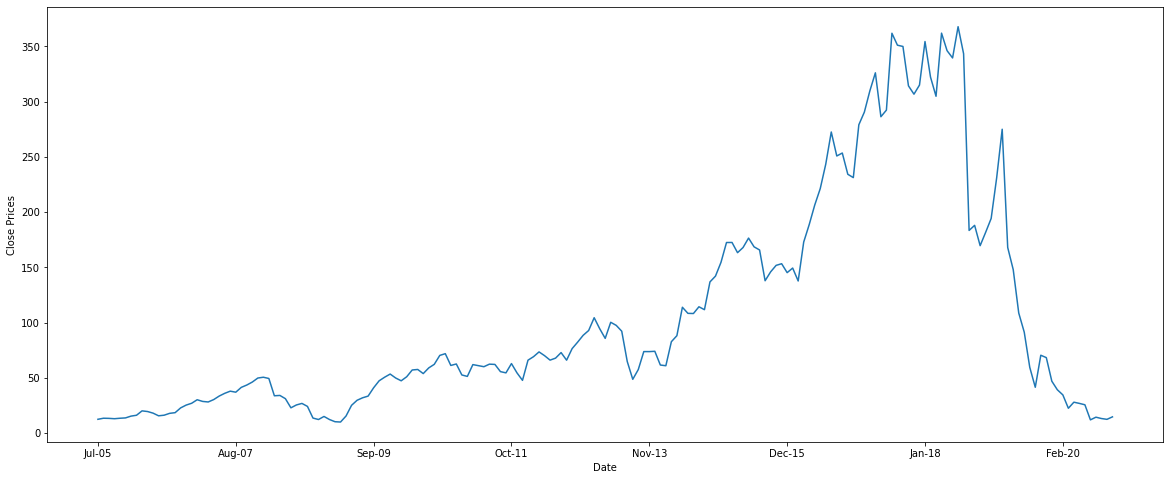

In [524]:
plt.figure(figsize=(20, 8))
dataset['Close'].plot()
plt.ylabel("Close Prices")
plt.show()

In [525]:
numeric_features = dataset.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

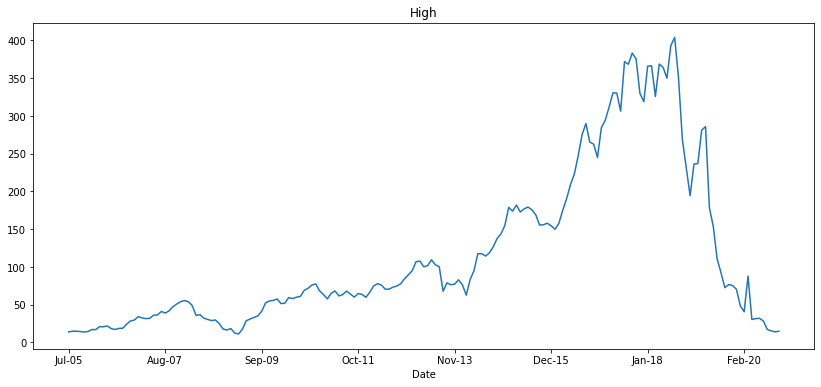

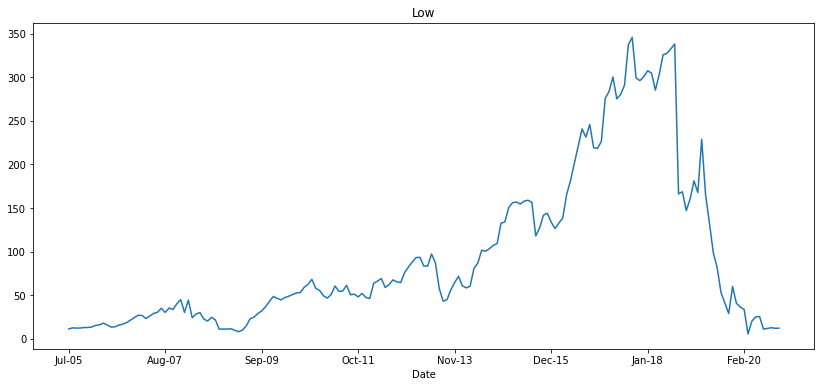

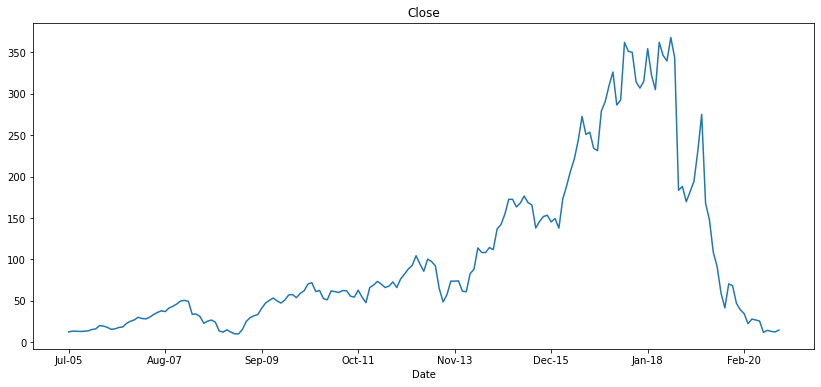

In [526]:
#@title Plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.plot()
    # feature.hist(bins=50, ax = ax)
    # ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    # ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

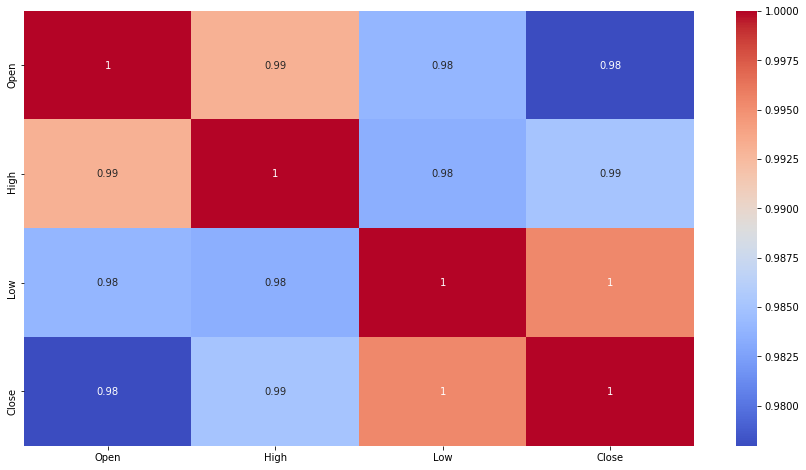

In [527]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [528]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [529]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [530]:
# Create a variable to predict 'x' days out into future
future_months = 6

In [531]:
dataset['Prediction'] = dataset[['Close']].shift(-future_months)

In [594]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Close', 'Open','High']]])

,variables,VIF
0,Low,9.333686
1,Prediction,9.333686


In [533]:
# X = dataset.drop(['Prediction'],axis=1).iloc[:-future_months, :-1].values

In [534]:
X = dataset.iloc[:-future_months]['Low'].values

In [535]:
len(X)

179

In [536]:
X = X.reshape(X.shape[0],1)

In [537]:
y = dataset['Close'][:-future_months].values

In [538]:
y

array([ 12.46,  13.42,  13.3 ,  12.99,  13.41,  13.71,  15.33,  16.12,
        20.08,  19.49,  18.03,  15.62,  16.16,  17.84,  18.46,  22.78,
        25.32,  26.97,  30.16,  28.63,  28.14,  30.31,  33.51,  35.98,
        37.93,  36.99,  41.36,  43.48,  46.18,  49.81,  50.54,  49.42,
        33.75,  34.06,  31.13,  22.85,  25.45,  26.83,  24.13,  13.58,
        12.26,  15.03,  12.24,  10.26,   9.98,  15.45,  25.12,  29.68,
        31.93,  33.45,  40.99,  47.31,  50.57,  53.41,  49.84,  47.32,
        50.97,  57.1 ,  57.57,  53.83,  58.99,  62.22,  70.3 ,  71.86,
        61.21,  62.54,  52.59,  51.29,  61.98,  61.02,  60.07,  62.38,
        62.13,  55.61,  54.5 ,  62.9 ,  54.49,  47.72,  65.99,  69.14,
        73.46,  70.07,  66.02,  67.83,  72.85,  65.97,  76.44,  82.29,
        88.48,  92.84, 104.41,  94.5 ,  85.71, 100.28,  97.49,  92.2 ,
        64.76,  48.65,  57.5 ,  73.76,  73.74,  74.02,  61.59,  60.95,
        82.7 ,  88.14, 113.89, 108.38, 108.21, 114.33, 111.7 , 136.83,
      

In [539]:
len(y)

179

In [540]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Training the Multiple Linear Regression model on the Training set

In [541]:
# from sklearn.tree import DecisionTreeRegressor
# tree = DecisionTreeRegressor().fit(X_train, y_train)


from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [542]:
dataset.iloc[-future_months:]['Low'].values

array([25.55, 11.1 , 11.85, 12.75, 12.11, 12.21])

In [543]:
X_future = dataset.iloc[-future_months:]['Low'].values
X_future = X_future.reshape(X_future.shape[0],1)
X_future

array([[25.55],
       [11.1 ],
       [11.85],
       [12.75],
       [12.11],
       [12.21]])

In [544]:
# X_future = dataset.drop(['Prediction'],1).iloc[:, :-1]
# X_future = X_future.tail(future_months).values
# X_future

In [545]:
X_future.shape

(6, 1)

In [546]:
# tree_prediction = tree.predict(X_future)
# print(tree_prediction)
# print()


lr_prediction = lr.predict(X_future)
print(lr_prediction)

[30.89 15.43 16.24 17.2  16.51 16.62]


In [547]:
dataset[X.shape[0]:]

,Open,High,Low,Close,Prediction
Date,,,,,
Jun-20,27.75,31.95,25.55,25.60,NaN
Jul-20,25.60,28.30,11.10,11.95,NaN
Aug-20,12.00,17.16,11.85,14.37,NaN
Sep-20,14.30,15.34,12.75,13.15,NaN
Oct-20,13.30,14.01,12.11,12.42,NaN
Nov-20,12.41,14.90,12.21,14.67,NaN


In [548]:
# predictions = tree_prediction

# valid = dataset[X.shape[0]:]
# valid['Prediction'] = predictions
# plt.figure(figsize=(70,20))
# plt.title('Tree Model')
# plt.xlabel('Days')
# plt.ylabel('Close Price')
# plt.plot(dataset['Close'])
# plt.plot(valid[['Close', 'Prediction']])
# plt.legend(['Original', 'Valid', 'Predict'])
# plt.xticks(rotation=90)
# plt.show

<function matplotlib.pyplot.show>

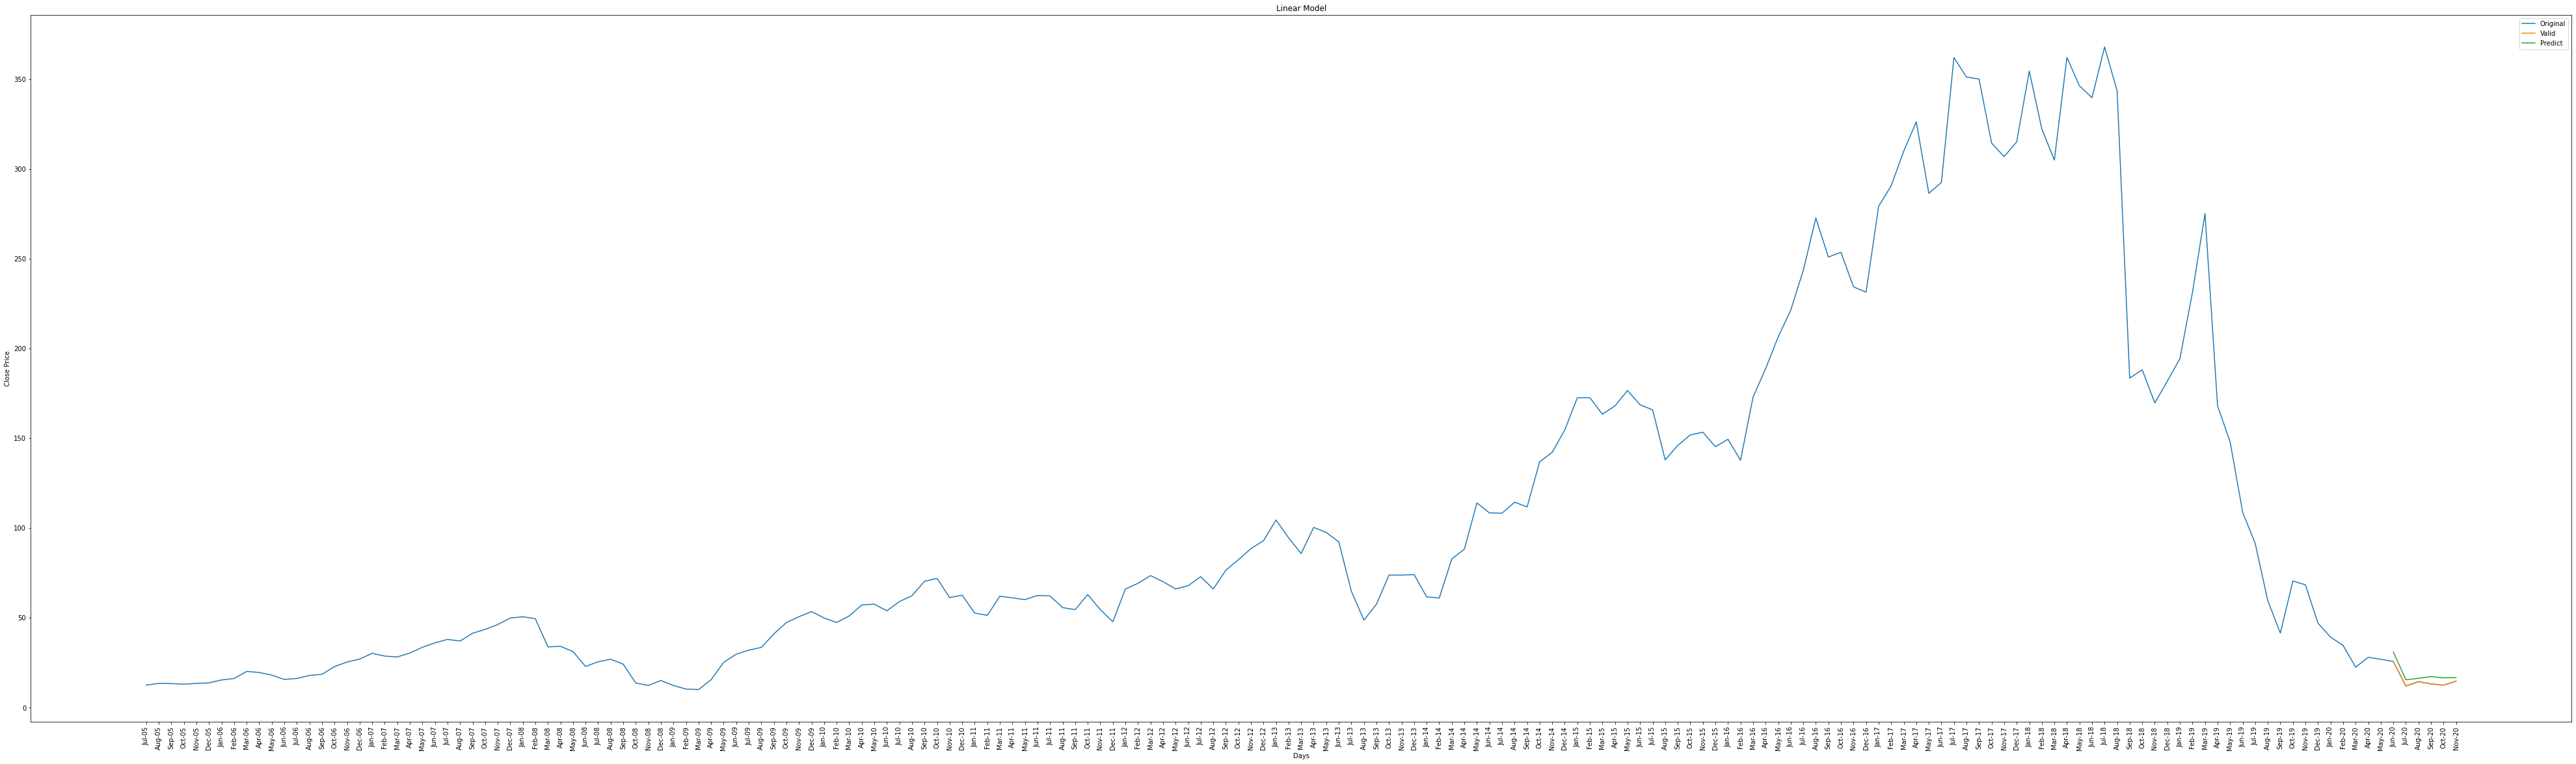

In [549]:
predictions = lr_prediction

valid = dataset[X.shape[0]:]
# valid = dataset[X.shape[0]-future_days:]
valid['Prediction'] = predictions
plt.figure(figsize=(70,20))
plt.title('Linear Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(dataset['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original', 'Valid', 'Predict'])
plt.xticks(rotation=90)
plt.show

In [550]:
lr.score(X_train, y_train)

0.9910539082557703

In [551]:
lr.coef_

array([1.07])

In [552]:
len(lr.coef_)

1

In [553]:
lr.intercept_

3.5581028490963007

In [554]:
y_pred = lr.predict(X_test)

In [555]:
y_pred

array([ 62.87,  35.68, 308.55, 168.87,  68.6 , 145.89,  28.16, 170.93,
        69.2 , 171.3 , 118.22,  20.03, 164.53, 325.19, 218.73,  55.76,
        57.75, 107.54,  91.52,  52.89,  55.01, 112.27,  20.35,  35.87,
        20.46,  34.06,  92.81,  51.7 , 245.65, 145.56,  35.91,  25.27,
       328.02, 103.26, 109.2 ,  92.8 ])

In [556]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 97.4473469194855
RMSE : 9.87154227663973


In [557]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test), (y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9875291519328624
Adjusted R2 :  0.9871623622838289


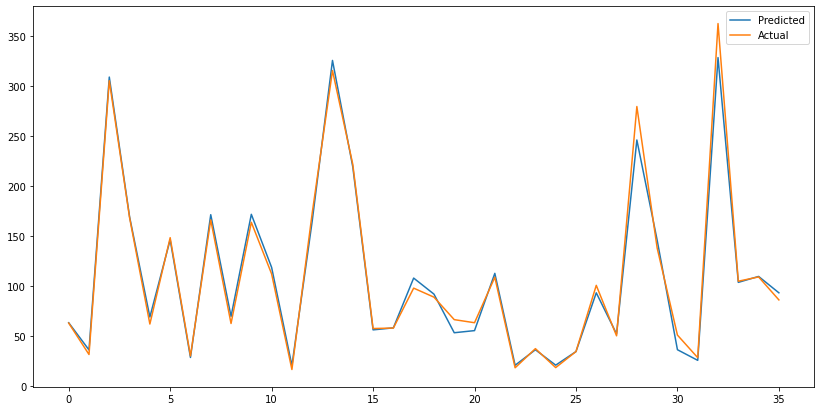

In [558]:
plt.figure(figsize=(14,7))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [559]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [560]:
lasso.score(X_train, y_train)

0.9910539082557701

In [561]:
lasso.coef_

array([1.07])

In [562]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [563]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -97.15303168539005


In [564]:
y_pred_lasso = lasso_regressor.predict(X_test)

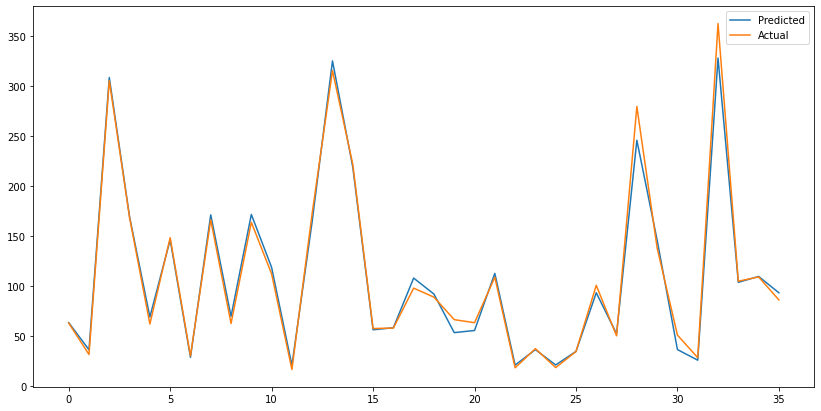

In [565]:
plt.figure(figsize=(14,7))
plt.plot((y_pred_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [566]:
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 98.40539295447509
RMSE : 9.919949241527151
R2 : 0.9874065457571032
Adjusted R2 :  0.9870361500440769


In [567]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [568]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -99.90189001942213


In [569]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [570]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 97.48200066203144
RMSE : 9.873297355090216
R2 : 0.9875247171116804
Adjusted R2 :  0.9871577970267299


In [571]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [572]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [573]:
elasticnet.score(X_train, y_train)

0.991053908136549

In [574]:
y_pred_en = elasticnet.predict(X_test)

In [575]:
MSE  = mean_squared_error((y_test), (y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 97.45213566807492
RMSE : 9.871784826872743
R2 : 0.9875285390915899
Adjusted R2 :  0.9871617314178132


In [576]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [577]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 30, 'l1_ratio': 0.3}

Using  {'alpha': 30, 'l1_ratio': 0.3}  the negative mean squared error is:  -97.1416403159556


In [578]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [579]:
MSE  = mean_squared_error((y_test), (y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 98.98031186644003
RMSE : 9.948884955935515
R2 : 0.9873329703686633
Adjusted R2 :  0.986960410673624


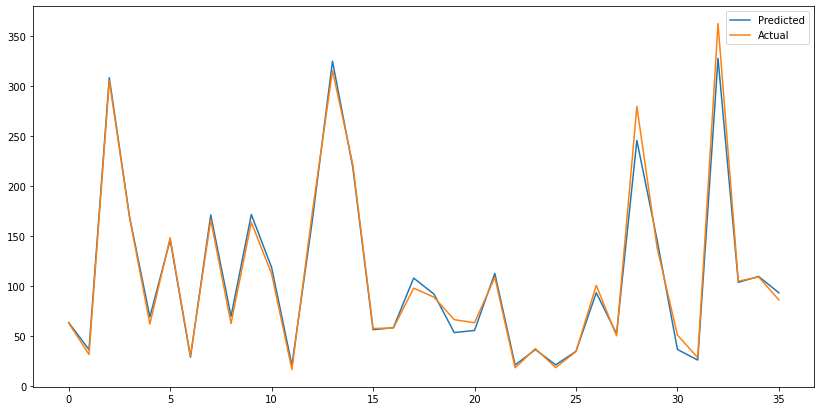

In [580]:
plt.figure(figsize=(14,7))
plt.plot((y_pred_elastic))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Training the Polynomial Regression model on the Training set

In [581]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [582]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 63.54  62.54]
 [ 34.52  31.13]
 [307.22 304.9 ]
 [172.8  167.96]
 [ 69.61  61.59]
 [149.65 147.95]
 [ 26.41  29.68]
 [174.85 165.74]
 [ 70.24  62.13]
 [175.23 163.31]
 [121.37 111.7 ]
 [ 17.62  16.12]
 [168.44 172.5 ]
 [322.5  315.05]
 [222.03 221.3 ]
 [ 56.    57.1 ]
 [ 58.11  57.57]
 [110.35  97.49]
 [ 93.69  88.48]
 [ 52.93  65.99]
 [ 55.2   62.9 ]
 [115.24 108.38]
 [ 17.97  17.84]
 [ 34.71  36.99]
 [ 18.08  18.03]
 [ 32.77  34.06]
 [ 95.04 100.28]
 [ 51.66  49.81]
 [248.03 279.1 ]
 [149.31 137.67]
 [ 34.76  50.54]
 [ 23.29  27.95]
 [325.09 362.05]
 [105.91 104.41]
 [112.06 108.7 ]
 [ 95.03  85.71]]


## Evaluating the Model Performance

In [583]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9860473544943377

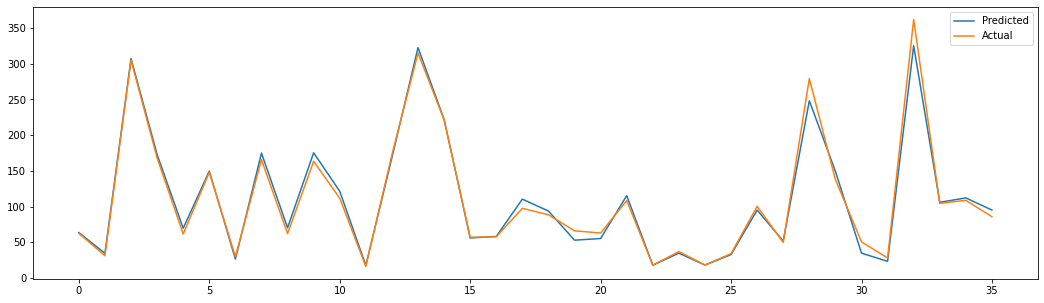

In [584]:
plt.figure(figsize=(18,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.show()

## Training the Decision Tree Regression model on the Training set

In [585]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

## Predicting the Test set results

In [586]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 62.38  62.54]
 [ 35.98  31.13]
 [309.82 304.9 ]
 [172.55 167.96]
 [ 61.02  61.59]
 [142.08 147.95]
 [ 28.14  29.68]
 [172.55 165.74]
 [ 67.83  62.13]
 [172.55 163.31]
 [136.83 111.7 ]
 [ 20.08  16.12]
 [169.65 172.5 ]
 [326.14 315.05]
 [231.26 221.3 ]
 [ 53.41  57.1 ]
 [ 61.98  57.57]
 [108.21  97.49]
 [ 91.3   88.48]
 [ 49.84  65.99]
 [ 53.41  62.9 ]
 [108.21 108.38]
 [ 20.08  17.84]
 [ 35.98  36.99]
 [ 20.08  18.03]
 [ 33.45  34.06]
 [ 91.3  100.28]
 [ 57.5   49.81]
 [275.05 279.1 ]
 [142.08 137.67]
 [ 35.98  50.54]
 [ 25.45  27.95]
 [322.25 362.05]
 [ 94.5  104.41]
 [108.21 108.7 ]
 [ 91.3   85.71]]


## Evaluating the Model Performance

In [587]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9865882078642062

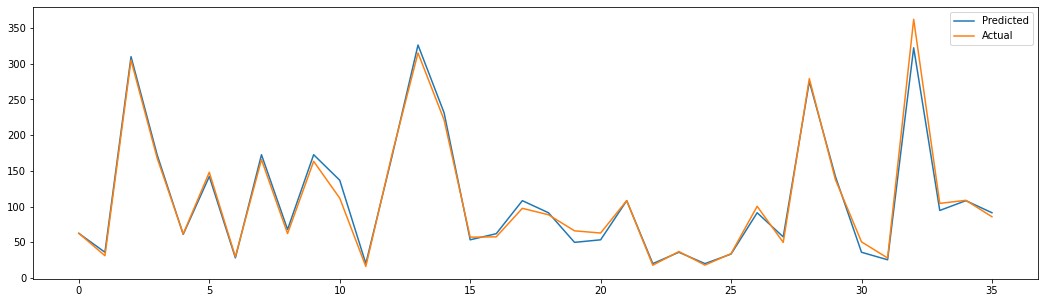

In [588]:
plt.figure(figsize=(18,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.show()

## Training the Random Forest Regression model on the whole dataset

In [589]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [590]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 64.66  62.54]
 [ 34.74  31.13]
 [318.5  304.9 ]
 [172.95 167.96]
 [ 66.08  61.59]
 [145.79 147.95]
 [ 27.61  29.68]
 [172.95 165.74]
 [ 67.27  62.13]
 [172.95 163.31]
 [126.71 111.7 ]
 [ 19.92  16.12]
 [168.31 172.5 ]
 [324.96 315.05]
 [225.38 221.3 ]
 [ 53.55  57.1 ]
 [ 59.32  57.57]
 [106.46  97.49]
 [ 89.72  88.48]
 [ 51.33  65.99]
 [ 53.55  62.9 ]
 [110.7  108.38]
 [ 19.92  17.84]
 [ 34.74  36.99]
 [ 19.92  18.03]
 [ 44.56  34.06]
 [ 89.72 100.28]
 [ 52.41  49.81]
 [267.79 279.1 ]
 [145.79 137.67]
 [ 34.74  50.54]
 [ 25.16  27.95]
 [323.03 362.05]
 [ 93.61 104.41]
 [106.46 108.7 ]
 [ 89.72  85.71]]


## Evaluating the Model Performance

In [591]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9873487538726571

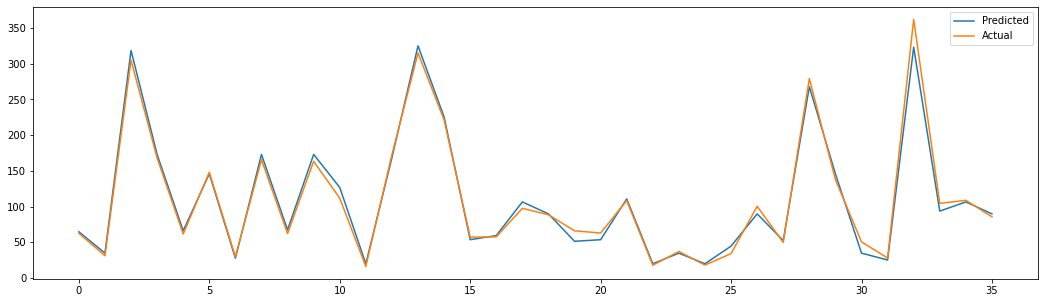

In [592]:
plt.figure(figsize=(18,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.show()